In [2]:
!pwd

/home/agenor/scoring_motifs_snps/output


In [3]:
from Bio.Seq import Seq
from Bio import motifs
from Bio.Blast import NCBIWWW
from Bio import Entrez, SeqIO
import pandas as pd

In [4]:
variants = pd.read_csv("/home/agenor/scoring_motifs_snps/output/gnomad_report_v6.csv")

print("Number of variants", len(variants[~variants.duplicated(subset="SNP_ID", keep="first")]))

var_both = variants[~variants.duplicated(subset=["SNP_ID", "studies"], keep="first")]

# Number of variants from GnomAD_genomic
g_var = var_both[var_both["studies"] == "GnomAD"]
print("Number of variants only in genomic sequences", len(g_var))


ex_var = var_both[var_both["studies"] == "GnomAD_exomes"]
print("Number of variants only in exomic sequences", len(ex_var))

Number of variants 242
Number of variants only in genomic sequences 143
Number of variants only in exomic sequences 167


In [5]:
def classify_freqs(row):
    if row["freqs"] > 0.05:
        return '> 0.5'
    elif 0.01 <= row["freqs"] <= 0.05:
        return '0.01-0.05'
    elif row["freqs"] < 0.01 and row["allele_count"] != 1:
        return '<0.01'
    else:
        return 'singleton'

In [6]:
# Classifying variants
g_var.loc[:, "maf_category"] = g_var.apply(classify_freqs, axis=1)

print(g_var.maf_category.value_counts())

# Variants with amf > 0.5
g_var[g_var.maf_category.isin(["> 0.5"])]

singleton    86
<0.01        56
> 0.5         1
Name: maf_category, dtype: int64


/tmp/ipykernel_12748/1078097648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var.loc[:, "maf_category"] = g_var.apply(classify_freqs, axis=1)


,Unnamed: 0,SNP_ID,DOCSUM,CLINICAL_SIGNIFICANCE,gene,snps,studies,freqs,allele_count,cleavage_position,hgvs_notation,motif,maf_category
465,465,10813831,"HGVS=NC_000009.12:g.32526148G>A,NC_000009.11:g...",benign,DDX58,10813831,GnomAD,0.237323,33164,P4,NP_055129.2:p.Arg7Cys,RSLQA,> 0.5


In [7]:
#  Variants in DDX58 gene
g_var[g_var["gene"] == "DDX58"]

,Unnamed: 0,SNP_ID,DOCSUM,CLINICAL_SIGNIFICANCE,gene,snps,studies,freqs,allele_count,cleavage_position,hgvs_notation,motif,maf_category
460,460,1434320972,"HGVS=NC_000009.12:g.32526141A>C,NC_000009.11:g...",NaN,DDX58,1434320972,GnomAD,0.000007,1,P2,NP_055129.2:p.Leu9Arg,RSLQA,singleton
461,461,767877838,"HGVS=NC_000009.12:g.32526144C>T,NC_000009.11:g...",uncertain-significance,DDX58,767877838,GnomAD,0.000021,3,P3,NP_055129.2:p.Ser8Asn,RSLQA,<0.01
465,465,10813831,"HGVS=NC_000009.12:g.32526148G>A,NC_000009.11:g...",benign,DDX58,10813831,GnomAD,0.237323,33164,P4,NP_055129.2:p.Arg7Cys,RSLQA,> 0.5


<AxesSubplot: >

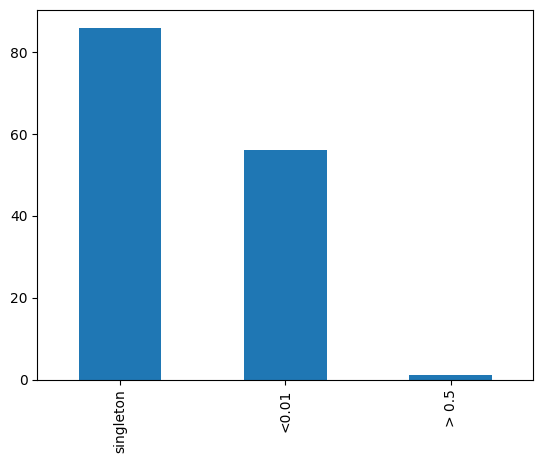

In [8]:
g_var.maf_category.value_counts().plot(kind="bar")

In [9]:
# Classifying variants (exomic variants)
ex_var.loc[:, "maf_category"] = ex_var.apply(classify_freqs, axis=1)

print(ex_var.maf_category.value_counts())

ex_var[ex_var.maf_category.isin(["> 0.5"])]

singleton    90
<0.01        76
> 0.5         1
Name: maf_category, dtype: int64


/tmp/ipykernel_12748/554894859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_var.loc[:, "maf_category"] = ex_var.apply(classify_freqs, axis=1)


,Unnamed: 0,SNP_ID,DOCSUM,CLINICAL_SIGNIFICANCE,gene,snps,studies,freqs,allele_count,cleavage_position,hgvs_notation,motif,maf_category
466,466,10813831,"HGVS=NC_000009.12:g.32526148G>A,NC_000009.11:g...",benign,DDX58,10813831,GnomAD_exomes,0.21211,52955,P4,NP_055129.2:p.Arg7Cys,RSLQA,> 0.5


<AxesSubplot: >

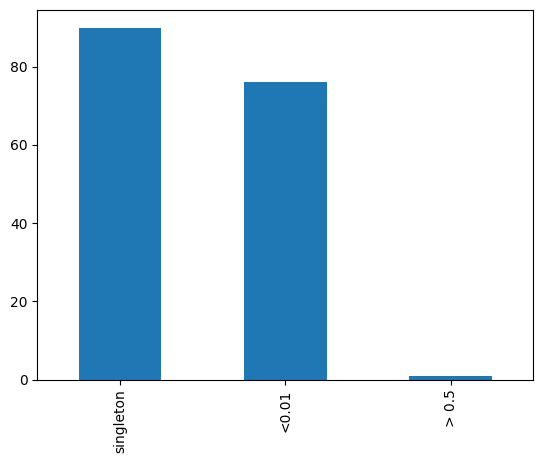

In [10]:
ex_var.maf_category.value_counts().plot(kind="bar")

In [13]:
ex_var[ex_var["gene"] == "DDX58"]

,Unnamed: 0,SNP_ID,DOCSUM,CLINICAL_SIGNIFICANCE,gene,snps,studies,freqs,allele_count,cleavage_position,hgvs_notation,motif,maf_category
462,462,767877838,"HGVS=NC_000009.12:g.32526144C>T,NC_000009.11:g...",uncertain-significance,DDX58,767877838,GnomAD_exomes,0.000004,1,P3,NP_055129.2:p.Ser8Asn,RSLQA,singleton
463,463,762091949,"HGVS=NC_000009.12:g.32526135G>A,NC_000009.12:g...",NaN,DDX58,762091949,GnomAD_exomes,0.000008,2,P1',NP_055129.2:p.Ala11Val,RSLQA,<0.01
466,466,10813831,"HGVS=NC_000009.12:g.32526148G>A,NC_000009.11:g...",benign,DDX58,10813831,GnomAD_exomes,0.212110,52955,P4,NP_055129.2:p.Arg7Cys,RSLQA,> 0.5


In [14]:
g_var["aa_wt"] = g_var["hgvs_notation"].apply(lambda x: x.split("p.")[1].split("|")[0][:3])
g_var["aa_sub"] = g_var["hgvs_notation"].apply(lambda x: x.split("p.")[1].split("|")[0][-3:])

ex_var["aa_wt"] = ex_var["hgvs_notation"].apply(lambda x: x.split("p.")[1].split("|")[0][:3])
ex_var["aa_sub"] = ex_var["hgvs_notation"].apply(lambda x: x.split("p.")[1].split("|")[0][-3:])

g_var.drop(g_var[g_var["aa_sub"] == "Ter"].index, inplace=True)
ex_var.drop(ex_var[ex_var["aa_sub"] == "Ter"].index, inplace=True)

/tmp/ipykernel_12748/587410476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var["aa_wt"] = g_var["hgvs_notation"].apply(lambda x: x.split("p.")[1].split("|")[0][:3])
/tmp/ipykernel_12748/587410476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var["aa_sub"] = g_var["hgvs_notation"].apply(lambda x: x.split("p.")[1].split("|")[0][-3:])
/tmp/ipykernel_12748/587410476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [15]:
AAS_CODE = {
    'A': 'Ala',
    'R': 'Arg',
    'N': 'Asn',
    'D': 'Asp',
    'C': 'Cys',
    'Q': 'Gln',
    'E': 'Glu',
    'G': 'Gly',
    'H': 'His',
    'I': 'Ile',
    'L': 'Leu',
    'K': 'Lys',
    'M': 'Met',
    'F': 'Phe',
    'P': 'Pro',
    'S': 'Ser',
    'T': 'Thr',
    'W': 'Trp',
    'Y': 'Tyr',
    'V': 'Val'
}

AAS_CODE = {v: k for k, v in AAS_CODE.items()}

AAS_CODE

{'Ala': 'A',
 'Arg': 'R',
 'Asn': 'N',
 'Asp': 'D',
 'Cys': 'C',
 'Gln': 'Q',
 'Glu': 'E',
 'Gly': 'G',
 'His': 'H',
 'Ile': 'I',
 'Leu': 'L',
 'Lys': 'K',
 'Met': 'M',
 'Phe': 'F',
 'Pro': 'P',
 'Ser': 'S',
 'Thr': 'T',
 'Trp': 'W',
 'Tyr': 'Y',
 'Val': 'V'}

In [16]:
g_var["aa_wt"] = g_var["aa_wt"].apply(lambda x: AAS_CODE[x])
g_var["aa_sub"] = g_var["aa_sub"].apply(lambda x: AAS_CODE[x])

ex_var["aa_wt"] = ex_var["aa_wt"].apply(lambda x: AAS_CODE[x])
ex_var["aa_sub"] = ex_var["aa_sub"].apply(lambda x: AAS_CODE[x])

/tmp/ipykernel_12748/2344658430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var["aa_wt"] = g_var["aa_wt"].apply(lambda x: AAS_CODE[x])
/tmp/ipykernel_12748/2344658430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var["aa_sub"] = g_var["aa_sub"].apply(lambda x: AAS_CODE[x])
/tmp/ipykernel_12748/2344658430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [17]:
POS_DICTIONARY = {0: "P4", 1: "P3", 2: "P2", 3: "P1", 4: "P1'"}

POS_DICTIONARY = {v: k for k, v in POS_DICTIONARY.items()}
POS_DICTIONARY

{'P4': 0, 'P3': 1, 'P2': 2, 'P1': 3, "P1'": 4}

In [18]:
def replace_aa(motif, position, new_aa):
    # Convert the string to a list of characters
    string_list = list(motif)
    
    # Replace the character at the specified position
    string_list[position] = new_aa
    
    # Convert the list of characters back to a string
    new_string = ''.join(string_list)
    
    return new_string

In [21]:
motif_sub = []
for i in range(len(g_var)):
    motif_sub.append(replace_aa(g_var.motif.iloc[i], 
                                POS_DICTIONARY[g_var.cleavage_position.iloc[i]], 
                                g_var.aa_sub.iloc[i]))


g_var["motif_sub"] = motif_sub

motif_sub_ex = []
for i in range(len(ex_var)):
    motif_sub_ex.append(replace_aa(ex_var.motif.iloc[i], 
                                POS_DICTIONARY[ex_var.cleavage_position.iloc[i]], 
                                ex_var.aa_sub.iloc[i]))


ex_var["motif_sub"] = motif_sub_ex

/tmp/ipykernel_12748/1559727692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var["motif_sub"] = motif_sub
/tmp/ipykernel_12748/1559727692.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_var["motif_sub"] = motif_sub_ex


In [22]:
instances = [Seq('PELQA'), Seq('SQLQS'), Seq('SAAQA'), Seq('ARLQA'), Seq('AVLQA'), Seq('VLLQA'), Seq('SRLQA'), 
             Seq('PNVHG'), Seq('ASIQM'), Seq('AQLMG'), Seq('PVLQS'), Seq('VVVQA'), Seq('LSLQS'), Seq('PTHQA'), 
             Seq('SMLQA'), Seq('ILLQS'), Seq('ANLQM'), Seq('GILQS'), Seq('KRLQS'), Seq('AVLQA'), Seq('ASGQA'), 
             Seq('AALQS'), Seq('SSLQG'), Seq('ARLQA'), Seq('AILQN'), Seq('SRFQS'), Seq('TTQQA'), Seq('AIAQA'), 
             Seq('GVFQH'), Seq('PTLQA'), Seq('AQQQA'), Seq('ARAQA'), Seq('SQLQG'), Seq('ATLQA'), Seq('PQMHS'), 
             Seq('PTLQA'), Seq('STPQA'), Seq('PELQS'), Seq('AVLQA'), Seq('VQLQS'), Seq('HQLQA'), Seq('GQLQA'), 
             Seq('GVFQH'), Seq('LRLQA'), Seq('ASSHS'), Seq('SGAQA'), Seq('TRLQE'), Seq('ATLHT'), Seq('VHIQA'), 
             Seq('LMLQG'), Seq('IELQA'), Seq('MKAQA'), Seq('PGIQS'), Seq('VLLQS'), Seq('TEMQS'), Seq('AVMEG'), 
             Seq('ARPHY'), Seq('SALQS'), Seq('LKFMS'), Seq('SDLQG'), Seq('RSLQS'), Seq('PRHQG'), Seq('PRHQG'), 
             Seq('PRHQG'), Seq('VHLQA'), Seq('SQAQA'), Seq('AHAQS'), Seq('PVLMA'), Seq('LILQG'), Seq('PVAQS'), 
             Seq('AAVQA'), Seq('SLAQA'), Seq('LRLQA'), Seq('ARAQA'), Seq('TAQRS'), Seq('AHAQS'), Seq('AHAQS'), 
             Seq('LRLQA'), Seq('TLLQA'), Seq('SRLHS'), Seq('AILQT'), Seq('ASFQS'), Seq('LKLQA'), Seq('SIMQS'), 
             Seq('AVLQS'), Seq('VTFQS'), Seq('ATVQS'), Seq('ATLQA'), Seq('VKLQN'), Seq('VRLQA'), Seq('PMLQS'), 
             Seq('TVLQA'), Seq('ATLQA'), Seq('TRLQS'), Seq('PKLQS'), Seq('ASLQS'), Seq('LTLQS'), Seq('KLFQG'), 
             Seq('VVLQA'), Seq('STLQA'), Seq('TRVQS'), Seq('RSLQA'), Seq('TCLQG'), Seq('GELQS'), Seq('ALLQS'), 
             Seq('VILQG'), Seq('AQLQV'), Seq('LLGEL'), Seq('LRMQG'), Seq('PALQS'), Seq('TKLQA')]

from Bio.Data import IUPACData
from Bio import motifs
m = motifs.create(instances, alphabet=IUPACData.protein_letters)

#From De Doolittle, 1989 
pseudocount = {"A": 0.078,
              "R": 0.051,
              "N": 0.043,
              "D": 0.053,
              "C": 0.019,
              "E": 0.063,
              "Q": 0.042,
              "G": 0.072,
              "H": 0.023,
              "I": 0.053,
              "L": 0.091,
              "K": 0.059,
              "M": 0.023,
              "F": 0.039,
              "P": 0.052,
              "S": 0.068,
              "T": 0.059,
              "W": 0.014,
              "Y": 0.032,
              "V": 0.066
              }


ppm = m.counts.normalize(pseudocounts = pseudocount) #position probability matrix from a position frequency matrix

pssm = ppm.log_odds(background=pseudocount) #posision-specific scoring matrix

In [23]:
scores_wt = []
scores_sub = []

for i in range(len(g_var)):
  score = 0
  for pos, aa in enumerate(g_var.iloc[i]["motif"]):
    score = score + pssm[aa][pos]
  scores_wt.append(score)

g_var["score"] = scores_wt

for i in range(len(g_var)):
  score = 0
  for pos, aa in enumerate(g_var.iloc[i]["motif_sub"]):
    score = score + pssm[aa][pos]
  scores_sub.append(score)

g_var["score_sub"] = scores_sub

/tmp/ipykernel_12748/1896774732.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var["score"] = scores_wt
/tmp/ipykernel_12748/1896774732.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var["score_sub"] = scores_sub


In [24]:
scores_wt = []
scores_sub = []

for i in range(len(ex_var)):
  score = 0
  for pos, aa in enumerate(ex_var.iloc[i]["motif"]):
    score = score + pssm[aa][pos]
  scores_wt.append(score)

ex_var["score"] = scores_wt

for i in range(len(ex_var)):
  score = 0
  for pos, aa in enumerate(ex_var.iloc[i]["motif_sub"]):
    score = score + pssm[aa][pos]
  scores_sub.append(score)

ex_var["score_sub"] = scores_sub

/tmp/ipykernel_12748/942868763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_var["score"] = scores_wt
/tmp/ipykernel_12748/942868763.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_var["score_sub"] = scores_sub


In [25]:
def score_normalizer(score):
    min_sc = -7.169387540064532
    max_sc = 13.246229435495378
    
    norm_score = round((score - min_sc) / (max_sc - min_sc), 2)
    
    return norm_score

In [26]:
g_var["score_norm"] = g_var.score.apply(lambda x: score_normalizer(x))
g_var["score_norm_sub"] = g_var.score_sub.apply(lambda x: score_normalizer(x))

ex_var["score_norm"] = ex_var.score.apply(lambda x: score_normalizer(x))
ex_var["score_norm_sub"] = ex_var.score_sub.apply(lambda x: score_normalizer(x))

/tmp/ipykernel_12748/3039912253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var["score_norm"] = g_var.score.apply(lambda x: score_normalizer(x))
/tmp/ipykernel_12748/3039912253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_var["score_norm_sub"] = g_var.score_sub.apply(lambda x: score_normalizer(x))
/tmp/ipykernel_12748/3039912253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [27]:
g_var

,Unnamed: 0,SNP_ID,DOCSUM,CLINICAL_SIGNIFICANCE,gene,snps,studies,freqs,allele_count,cleavage_position,hgvs_notation,motif,maf_category,aa_wt,aa_sub,motif_sub,score,score_sub,score_norm,score_norm_sub
0,0,1773411385,"HGVS=NC_000006.12:g.30704693T>C,NC_000006.11:g...",NaN,MDC1,1773411385,GnomAD,0.000007,1,P1,NP_055456.2:p.Gln1497Arg,PELQA,singleton,Q,R,PELRA,10.584797,3.746483,0.87,0.53
2,2,1361884254,"HGVS=NC_000006.12:g.30704691C>G,NC_000006.11:g...",NaN,MDC1,1361884254,GnomAD,0.000026,3,P1',NP_055456.2:p.Ala1498Pro,PELQA,<0.01,A,P,PELQP,10.584797,1.378408,0.87,0.42
3,3,1315850675,"HGVS=NC_000017.11:g.77402640C>G,NC_000017.11:g...",NaN,SEPTIN9,1315850675,GnomAD,0.000007,1,P1,NP_001106963.1:p.Gln220Glu,SQLQS,singleton,Q,E,SQLES,11.607408,5.437220,0.92,0.62
10,10,568300829,"HGVS=NC_000001.11:g.67430137G>C,NC_000001.10:g...",NaN,SERBP1,568300829,GnomAD,0.000021,3,P2,NP_001018079.1:p.Ala55Gly|SEQ=[G/C]|LEN=1|GENE...,SAAQA,<0.01,A,G,SAGQA,7.816159,5.388351,0.73,0.62
12,12,779220012,"HGVS=NC_000002.12:g.54653637G>A,NC_000002.11:g...",NaN,SPTBN1,779220012,GnomAD,0.000007,1,P3,NP_003119.2:p.Arg1869His,ARLQA,singleton,R,H,AHLQA,13.246229,12.398040,1.00,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,525,2071076381,"HGVS=NC_000023.11:g.154558579G>A,NC_000023.11:...",NaN,IKBKG,2071076381,GnomAD,0.000011,1,P4,NP_001093327.1:p.Leu149Phe,LLGEL,singleton,L,F,FLGEL,-7.169388,-14.098695,0.00,-0.34
526,526,1247511735,"HGVS=NC_000023.11:g.154558583G>A,NW_003871103....",NaN,IKBKG,1247511735,GnomAD,0.000010,1,P2,NP_001093327.1:p.Gly151Arg,LLGEL,singleton,G,R,LLREL,-7.169388,-12.016271,0.00,-0.24
528,528,1949317342,"HGVS=NC_000012.12:g.132804963C>A,NC_000012.11:...",NaN,GOLGA3,1949317342,GnomAD,0.000000,0,P1,NP_001376612.1:p.Gln450His,TKLQA,<0.01,Q,H,TKLHA,9.994863,6.824132,0.84,0.69
529,529,1341739859,"HGVS=NC_000012.12:g.132804973G>A,NC_000012.11:...",NaN,GOLGA3,1341739859,GnomAD,0.000007,1,P4,NP_001376612.1:p.Thr447Met,TKLQA,singleton,T,M,MKLQA,9.994863,8.056335,0.84,0.75


In [28]:
ex_var

,Unnamed: 0,SNP_ID,DOCSUM,CLINICAL_SIGNIFICANCE,gene,snps,studies,freqs,allele_count,cleavage_position,hgvs_notation,motif,maf_category,aa_wt,aa_sub,motif_sub,score,score_sub,score_norm,score_norm_sub
1,1,1381381300,"HGVS=NC_000006.12:g.30704700C>T,NC_000006.11:g...",NaN,MDC1,1381381300,GnomAD_exomes,0.000004,1,P3,NP_055456.2:p.Glu1495Lys,PELQA,singleton,E,K,PKLQA,10.584797,10.938521,0.87,0.89
7,7,1400160697,"HGVS=NC_000001.11:g.67430140G>A,NC_000001.10:g...",NaN,SERBP1,1400160697,GnomAD_exomes,0.000004,1,P3,NP_001018079.1:p.Ala54Val|SEQ=[G/A]|LEN=1|GENE...,SAAQA,singleton,A,V,SVAQA,7.816159,9.161317,0.73,0.80
8,8,779658689,"HGVS=NC_000001.11:g.67430144T>C,NC_000001.10:g...",NaN,SERBP1,779658689,GnomAD_exomes,0.000012,3,P4,NP_001018079.1:p.Ser53Gly|SEQ=[T/C]|LEN=1|GENE...,SAAQA,<0.01,S,G,GAAQA,7.816159,6.070134,0.73,0.65
9,9,750120102,"HGVS=NC_000001.11:g.67430131G>A,NC_000001.10:g...",NaN,SERBP1,750120102,GnomAD_exomes,0.000004,1,P1',NP_001018079.1:p.Ala57Val|SEQ=[G/A]|LEN=1|GENE...,SAAQA,singleton,A,V,SAAQV,7.816159,2.623369,0.73,0.48
11,11,568300829,"HGVS=NC_000001.11:g.67430137G>C,NC_000001.10:g...",NaN,SERBP1,568300829,GnomAD_exomes,0.000012,3,P2,NP_001018079.1:p.Ala55Gly|SEQ=[G/C]|LEN=1|GENE...,SAAQA,<0.01,A,G,SAGQA,7.816159,5.388351,0.73,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,527,1362552867,"HGVS=NC_000014.9:g.39177596G>A,NC_000014.8:g.3...",NaN,PNN,1362552867,GnomAD_exomes,0.000008,2,P3,NP_002678.3:p.Ala111Thr|SEQ=[G/A]|LEN=1|GENE=P...,PALQS,<0.01,A,T,PTLQS,10.462718,11.968853,0.86,0.94
530,530,1341739859,"HGVS=NC_000012.12:g.132804973G>A,NC_000012.11:...",NaN,GOLGA3,1341739859,GnomAD_exomes,0.000008,2,P4,NP_001376612.1:p.Thr447Met,TKLQA,<0.01,T,M,MKLQA,9.994863,8.056335,0.84,0.75
531,531,1341345896,"HGVS=NC_000012.12:g.132804965G>C,NC_000012.11:...",NaN,GOLGA3,1341345896,GnomAD_exomes,0.000004,1,P1,NP_001376612.1:p.Gln450Glu,TKLQA,singleton,Q,E,TKLEA,9.994863,3.824676,0.84,0.54
532,532,773068949,"HGVS=NC_000012.12:g.132804964T>C,NC_000012.11:...",NaN,GOLGA3,773068949,GnomAD_exomes,0.000012,3,P1,NP_001376612.1:p.Gln450Arg,TKLQA,<0.01,Q,R,TKLRA,9.994863,3.156549,0.84,0.51


In [46]:
g_var.score_norm_sub.sort_values()

525   -0.34
526   -0.24
265    0.04
264    0.11
294    0.17
       ... 
375    0.91
110    0.92
33     0.92
35     0.95
12     0.96
Name: score_norm_sub, Length: 142, dtype: float64

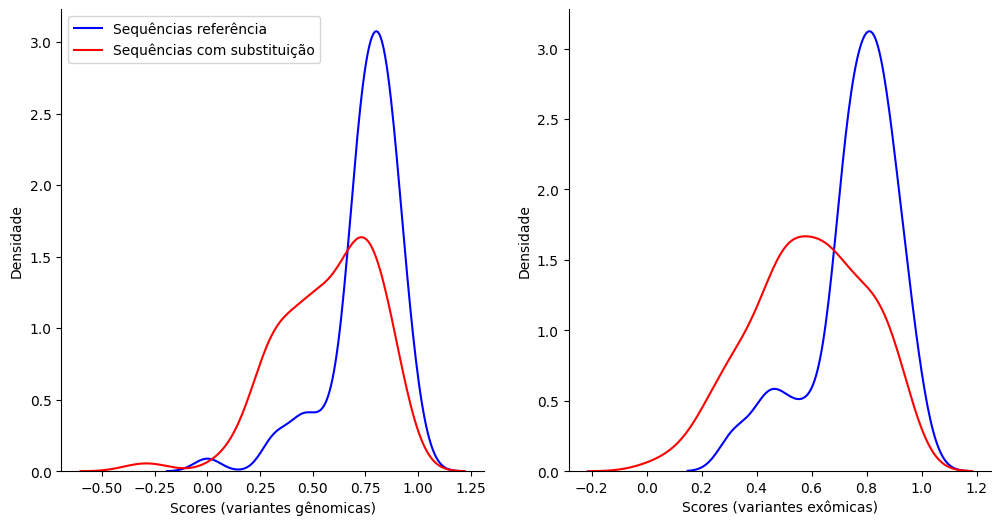

In [65]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.kdeplot(data=g_var["score_norm"], ax=ax1[0], color="blue")
sns.kdeplot(data=g_var["score_norm_sub"], ax=ax1[0], color="red")

sns.kdeplot(data=ex_var["score_norm"], ax=ax1[1], color="blue")
sns.kdeplot(data=ex_var["score_norm_sub"], ax=ax1[1], color="red")

# Adding labels and title to each subplot
ax1[0].set_xlabel('Scores (variantes gênomicas)')
ax1[0].set_ylabel('Densidade')
#ax1[0].set_title('Plot 1')

ax1[1].set_xlabel('Scores (variantes exômicas)')
ax1[1].set_ylabel('Densidade')
#ax1[1].set_title('Plot 2')

ax1[0].legend(["Sequências referência", "Sequências com substituição"])

for s in ['top', 'right']:
    ax1[0].spines[s].set_visible(False)
    ax1[1].spines[s].set_visible(False)
    
fig.savefig("score_dist.jpg", format='jpg')